<h1>Assignment: Predicting 2024 Data Science Salaries Using Linear Regression</h1>
<hr>


<h1>Setting up</h1> 

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [17]:
# Load the dataset
ds = pd.read_csv('Data Science Salary 2021 to 2023.csv')

In [18]:
# Display first few rows
ds.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L


In [19]:
# Check basic info
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3761 non-null   int64 
 1   experience_level  3761 non-null   object
 2   employment_type   3761 non-null   object
 3   job_title         3761 non-null   object
 4   salary            3761 non-null   int64 
 5   salary_currency   3761 non-null   object
 6   salary_in_usd     3761 non-null   int64 
 7   company_location  3761 non-null   object
 8   company_size      3761 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.6+ KB


<h1>EDA</h1>

In [20]:
# How many unique job titles are there?
unique_jobs = ds['job_title'].nunique()
print(f"Number of unique job titles: {unique_jobs}")


Number of unique job titles: 93


In [21]:
# What is the average salary (salary_in_usd) per work_year?
avg_salary_by_year = ds.groupby('work_year')['salary_in_usd'].mean().reset_index()
print(avg_salary_by_year)


   work_year  salary_in_usd
0       2020   92302.631579
1       2021   94087.208696
2       2022  133379.510804
3       2023  148954.558413


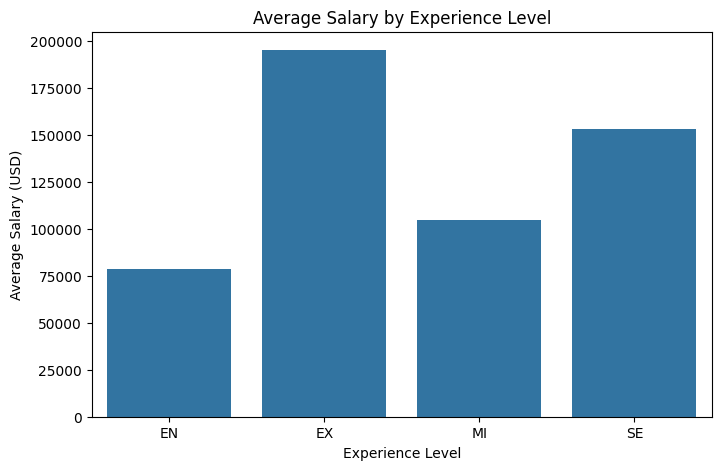

In [22]:
# Create a bar plot showing average salary by experience_level
plt.figure(figsize=(8,5))
sns.barplot(data=ds, x='experience_level', y='salary_in_usd', estimator='mean', errorbar=None)
plt.title("Average Salary by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Average Salary (USD)")
plt.show()

<h1>Data Preprocessing for Linear Regression</h1>

In [23]:
# Encode categorical variable
le = LabelEncoder()
ds['experience_level_encoded'] = le.fit_transform(ds['experience_level'])

# Choose features
features = ['work_year', 'experience_level_encoded']
X = ds[features]
y = ds['salary_in_usd']

# Check encoding
print("Encoded experience levels:", dict(zip(le.classes_, le.transform(le.classes_))))
X.head()

Encoded experience levels: {'EN': np.int64(0), 'EX': np.int64(1), 'MI': np.int64(2), 'SE': np.int64(3)}


,work_year,experience_level_encoded
0,2023,0
1,2023,0
2,2023,0
3,2023,0
4,2023,0


<h1>Train a Linear Regression Model</h1>

In [24]:
# Split data into train/test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")

R² Score: 0.15
RMSE: 59164.82


<h1>Predict 2024 Salaries</h1>

In [25]:
# Check LabelEncoder classes
print("Experience level encoding:", list(le.classes_))

# Example mapping (adjust if your encoding differs)
future_data = pd.DataFrame({
    'work_year': [2024, 2024, 2024, 2024],
    'experience_level_encoded': [0, 1, 2, 3]  # Adjust based on encoder output
})

# Predict
predicted_salaries = model.predict(future_data)

# Display results
results = pd.DataFrame({
    'Experience Level': ['Entry', 'Mid', 'Senior', 'Executive'],
    'Predicted 2024 Salary (USD)': predicted_salaries
})

results

Experience level encoding: ['EN', 'EX', 'MI', 'SE']


,Experience Level,Predicted 2024 Salary (USD)
0,Entry,111694.914909
1,Mid,131967.434578
2,Senior,152239.954247
3,Executive,172512.473916


<h1>Reflection</h1>
<hr>

<h1>Does your model make reasonable predictions?</h1>
<p>yes as thge model provides the trend of salaries increase with experience and work year.
    However, it likely underestimates or overestimates some roles because it only uses two variables.</p>

<h1>What are the limitations of using only `work_year` and `experience_level`?</h1>
<p>the limitations it ignores are the job title, company size, location, and remote work which are factors significantly affecting salary variation.</p>

<h1>How could you improve this model?</h1>
<p>maybe adding more features like `job_title`, `company_size`, and `employment_type` that could help in broadening the model </p>

<h1>Why is R² not enough to trust your predictions?</h1>
<p>a high R² doesn’t ensure the model generalizes well and it can’t capture non-linear relationships.</p>
